In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import pickle

In [2]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC
from sklearn import svm
#from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('datanama1.xlsx')

In [4]:
data.head()

,Nama,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m


In [5]:
len(data)

10000

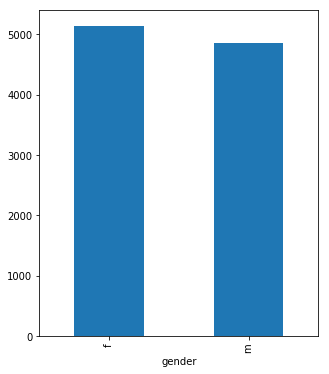

In [6]:
fig = plt.figure(figsize=(5,6))
data.groupby('gender').Nama.count().plot.bar(ylim=0)
plt.show()

In [7]:
data.loc[:,"Nama"] = data["Nama"].str.lower() 
data.loc[:,"Nama"] = data["Nama"].apply(lambda x: re.sub(r"[^a-z]"," ",x))

In [8]:
data.gender.replace({'f':0,'m':1},inplace = True)

In [9]:
# duplicateRowsDF = data[data.duplicated()]
# data = data.drop_duplicates(keep='first')
# print(len(data))

In [10]:
tf = TfidfVectorizer()
X = data['Nama']
y = data['gender']

In [11]:
x_train = tf.fit_transform(X)

In [12]:
tf.vocabulary_['rizki']

6496

In [13]:
tf.vocabulary_['maulidina']

4597

In [14]:
tf.vocabulary_['prima']

5953

In [15]:
x_train.shape

(10000, 9371)

In [16]:
classifier = svm.SVC(kernel="linear")
classifier.fit(x_train,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
testing = pd.read_excel('testingnama1.xlsx')

In [18]:
len(testing)

4919

In [19]:
testing.loc[:,"Nama"] = testing["Nama"].str.lower() 
testing.loc[:,"Nama"] = testing["Nama"].apply(lambda x: re.sub(r"[^a-z]"," ",x))
testing.gender.replace({'f':0,'m':1},inplace = True)

In [20]:
sample_name = testing["Nama"]
vect = tf.transform(sample_name).toarray()
predicted = classifier.predict(vect)

In [21]:
sklearn.metrics.accuracy_score(testing["gender"],predicted)

0.8280138239479569

In [22]:
sklearn.metrics.confusion_matrix(testing["gender"],predicted,labels=[0,1])

array([[2420,   98],
       [ 748, 1653]], dtype=int64)

In [23]:
mapping_gender = {0:"Perempuan", 1:"Laki-laki"}

name = ["jokowi", "dewi", "pandu","marlina","intan","faiz","jonathan","axel","elan","kevin"]
nama = tf.transform(name).toarray()

label = [mapping_gender[i] for i in classifier.predict(nama)]

res = []
for name, predict in zip(name,label):
	res.append({"nama":name, "predict":predict})

print(res)

[{'nama': 'jokowi', 'predict': 'Laki-laki'}, {'nama': 'dewi', 'predict': 'Perempuan'}, {'nama': 'pandu', 'predict': 'Laki-laki'}, {'nama': 'marlina', 'predict': 'Perempuan'}, {'nama': 'intan', 'predict': 'Perempuan'}, {'nama': 'faiz', 'predict': 'Laki-laki'}, {'nama': 'jonathan', 'predict': 'Laki-laki'}, {'nama': 'axel', 'predict': 'Perempuan'}, {'nama': 'elan', 'predict': 'Laki-laki'}, {'nama': 'kevin', 'predict': 'Laki-laki'}]


In [24]:
file = open('gender_tfidf1.pkl','wb')
pickle.dump(tf,file)
file.close()

In [25]:
file1 = open('gender_model1.pkl','wb')
pickle.dump(classifier,file1)
file1.close()